<a href="https://colab.research.google.com/github/shimyoubin/2025-1-myclass-BDA/blob/main/inclass/05w_B_wnd_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05주차 수업

In [2]:
import numpy as np
import pandas as pd


In [4]:
df_raw = pd.DataFrame({'var1': [1,2,1],
                       'var2' : [2,3,2],
                       'var3':[10,20,30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [7]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [8]:
id(df_new) == id(df_raw)

False

In [9]:
df_new.rename(columns={'var2':'v2'})

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [11]:
df_new.rename(index={0:'x', 1:'y', 2:'z'},inplace=True)
df_new

,var1,var2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [12]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [13]:
df

,A,B
0,1,4
1,2,5
2,3,6


## 파생변수 생성 * 시험!!

In [14]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2' : [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [15]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [16]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [17]:
df1["var_mean"] = (df1["var1"] + df1["var2"]) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [19]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [20]:
df2.sum()

,0
var1,15
var2,9


In [21]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [22]:
df2['my_sum'] = df2.sum(axis='columns') # axis=1 이랑 같음
df2

,var1,var2,my_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [23]:
df2[["var1","var2"]]

,var1,var2
0,4,2
1,3,6
2,8,1


In [24]:
df2["my_mean"] = df2[["var1","var2"]].mean(axis=1) # 시험 예상
df2

,var1,var2,my_sum,my_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


## MPG연비 변수 생성


In [25]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [28]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [34]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0,24.0
124,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20,r,suv,17.5,17.5
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,25.0


In [37]:
mpg.cty

,cty
0,18
1,21
2,20
3,21
4,16
...,...
229,19
230,21
231,16
232,18


In [39]:
mpg.total=(mpg.cty + mpg.hwy) /2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [35]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [31]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis='columns')  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [32]:
sum(mpg['total']) / len(mpg)  # total 합계를 행 수로 나누기

20.14957264957265

In [33]:
mpg['total'].mean()

np.float64(20.14957264957265)

## 조건문을 활용

In [40]:
mpg['total'].describe()

,total
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


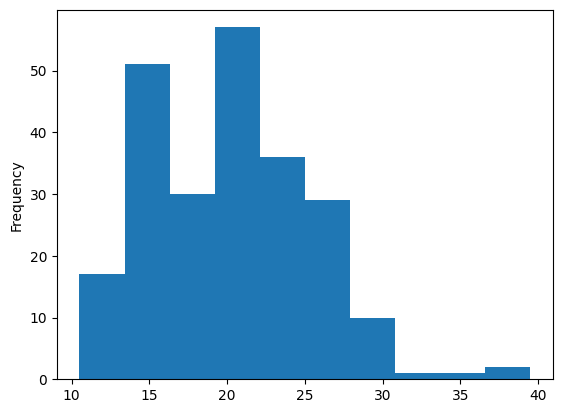

In [41]:
mpg['total'].plot.hist();

In [42]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.4 MB/s eta 0:00:00


In [43]:
import koreanize_matplotlib

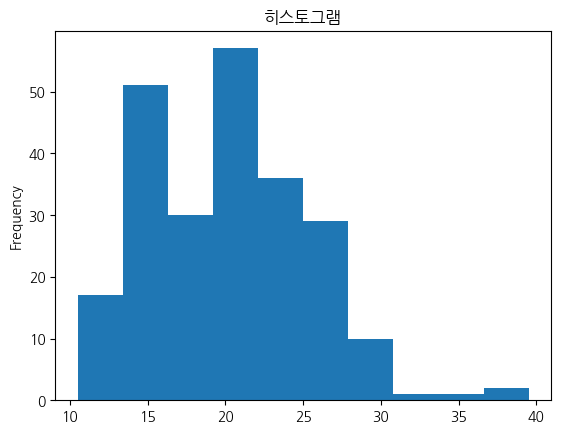

In [44]:
mpg['total'].plot(kind="hist", title="히스토그램");

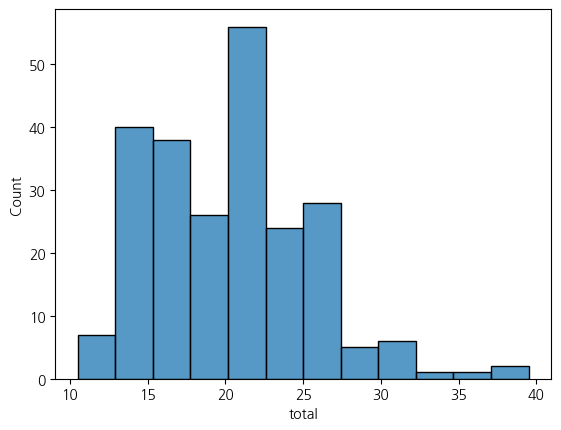

In [45]:
import seaborn as sns

sns.histplot(mpg, x="total"); # x=mpg.total